In [2]:
# from https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [4]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_image
print(input_image)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1282x1026 at 0x7F96B88AC410>


In [28]:
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

tensor([33554431,    32767,  2097151])
tensor([[        0,         0,         0],
        [ 33554431,     32767,   2097151],
        [ 67108862,     65534,   4194302],
        [100663293,     98301,   6291453],
        [134217724,    131068,   8388604],
        [167772155,    163835,  10485755],
        [201326586,    196602,  12582906],
        [234881017,    229369,  14680057],
        [268435448,    262136,  16777208],
        [301989879,    294903,  18874359],
        [335544310,    327670,  20971510],
        [369098741,    360437,  23068661],
        [402653172,    393204,  25165812],
        [436207603,    425971,  27262963],
        [469762034,    458738,  29360114],
        [503316465,    491505,  31457265],
        [536870896,    524272,  33554416],
        [570425327,    557039,  35651567],
        [603979758,    589806,  37748718],
        [637534189,    622573,  39845869],
        [671088620,    655340,  41943020]])
[[  0   0   0]
 [  1 127  31]
 [  2 254  62]
 [  3 126  9

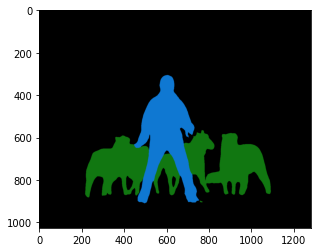

In [26]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# tensor([33554431,    32767,  2097151])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
print (colors)
colors = (colors % 255).numpy().astype("uint8")
print (colors)

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)